In [450]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [451]:
path_1 = os.path.join("C:\Projects", "huboo", "data", "top_down_pick_and_pack_detection.csv.txt")
data = pd.read_csv(path_1)

path_2 = os.path.join("C:\Projects", "huboo", "data", "associations_top_down_pick_and_pack.csv.txt")
tracklets = pd.read_csv(path_2)

In [452]:
#Manually fix ReId errors
#Man = 1, woman = 2
#21 -> 2

tracklets[" person_id"][7] = 2

In [447]:
pd.set_option('display.max_rows', 10000)

In [448]:
data.describe()

,frame,tracklet_id,l,t,w,h,probability_of_detection
count,77987.000000,77987.000000,77987.000000,77987.000000,77987.000000,77987.000000,77987.000000
mean,19810.972598,42.852886,1113.925946,435.583056,188.664852,323.141956,0.829463
std,10758.098987,32.931803,355.505516,131.989631,31.743167,59.424777,0.125945
min,859.000000,1.000000,-40.050000,-390.490000,83.080000,125.190000,0.100000
25%,10831.000000,21.000000,890.300000,437.895000,171.020000,296.880000,0.840000
50%,19574.000000,24.000000,1214.150000,476.050000,185.160000,322.370000,0.870000
75%,28915.500000,74.000000,1411.610000,489.525000,203.480000,344.420000,0.880000
max,38329.000000,109.000000,1731.450000,833.850000,402.260000,812.030000,0.960000


In [453]:
identity = pd.merge(data, tracklets, on='tracklet_id', how='left')

person_1 = identity[identity[" person_id"] == 1.0]
person_1 = person_1.reset_index()

person_2 = identity[identity[" person_id"] == 2.0]
person_2 = person_2.reset_index()

identity[" person_id"].value_counts()

2.0    36542
1.0    34393
4.0      969
3.0      324
Name:  person_id, dtype: int64

In [454]:
#Truncate data, clips ends off ~1200 each end, the time it took to reach the top of the forklift.
TRUNC = 1200
person_1 = person_1.truncate(before=TRUNC, after=len(person_1)-TRUNC).reset_index()
person_2 = person_2.truncate(before=TRUNC, after=len(person_2)-TRUNC).reset_index()

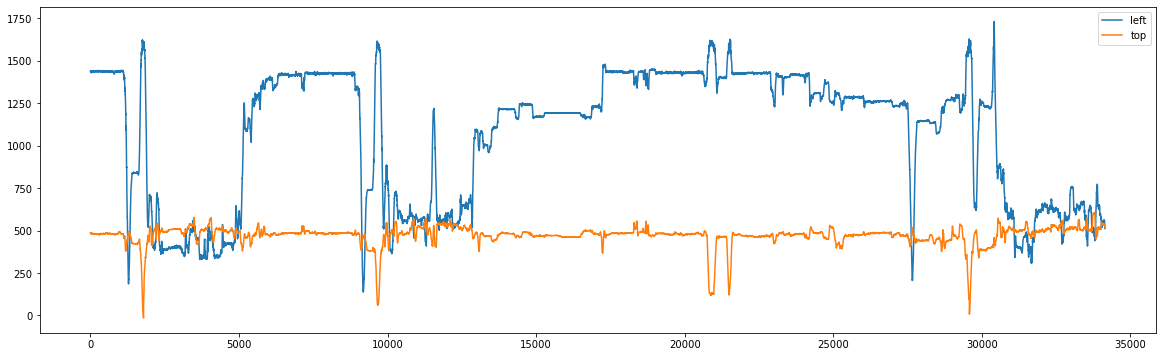

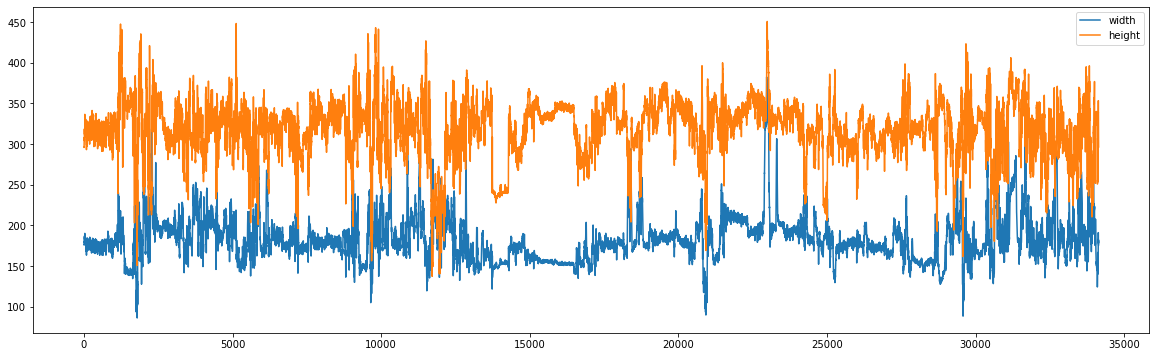

In [455]:
#Basic data plotting

PERSON = person_2

plt.rcParams["figure.figsize"] = (20,6)

plt.plot(PERSON["l"].to_list(), label = "left")
plt.plot(PERSON["t"].to_list(), label = "top")
plt.legend()
plt.show()

plt.plot(PERSON["w"].to_list(), label = "width")
plt.plot(PERSON["h"].to_list(), label = "height")
plt.legend()
plt.show()

In [456]:
#Position
#Position given by the middle bottom of the box. 
#position = (left, top) + 0.5 * (width, height)

person_1["position"] = np.array(zip(person_1["l"] + person_1["w"] / 2, person_1["t"] + person_1["h"] / 2))
person_1["x"] = person_1["l"] + person_1["w"] / 2
person_1["y"] = person_1["t"] + person_1["h"] / 2

person_2["position"] = np.array(zip(person_2["l"] + person_2["w"] / 2, person_2["t"] + person_2["h"] / 2))    #Can add: [1]*len(person_1), if want to transform.
person_2["x"] = person_2["l"] + person_2["w"] / 2
person_2["y"] = person_2["t"] + person_2["h"] / 2

In [320]:
#Plots

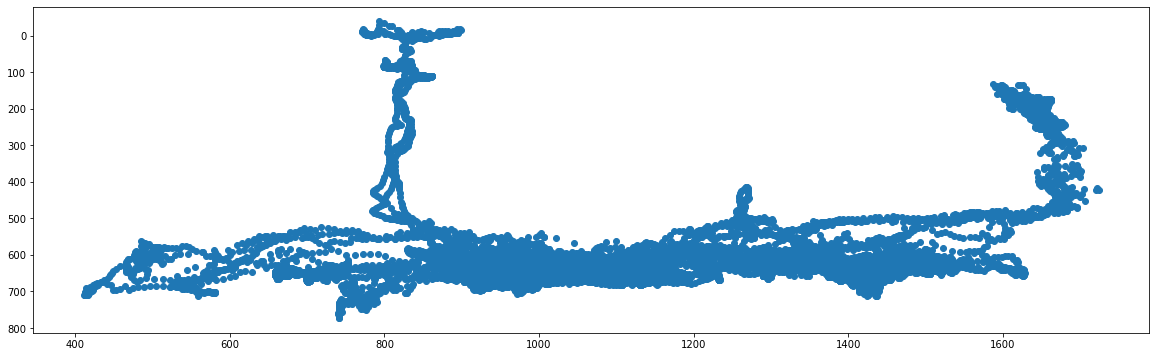

In [457]:
plt.gca().invert_yaxis()
plt.scatter(*zip(*person_1["position"]))

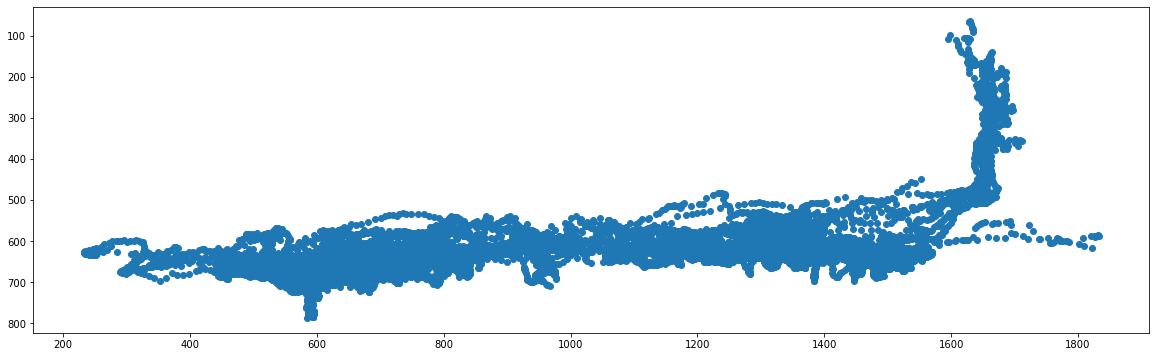

In [458]:
plt.gca().invert_yaxis()
plt.scatter(*zip(*person_2["position"]))

Now we create a heatmap

In [459]:
from scipy import stats, integrate
import seaborn as sns

In [460]:
x1 = []
y1 = []
for i in range(len(person_1)):
    x1.append(person_1["position"][i][0])
    y1.append(800 - person_1["position"][i][1])                  #Invert y-axis

In [461]:
min(y)

27.585000000000036

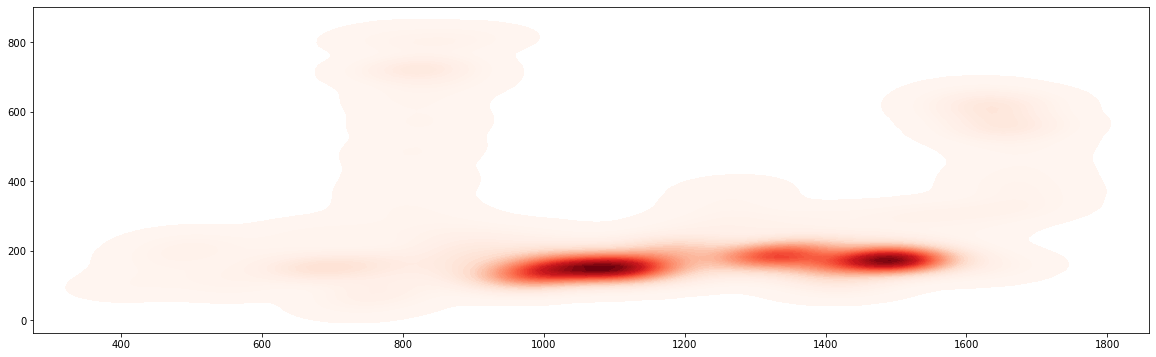

In [462]:
# call the kernel density estimator function
#ax = sns.kdeplot(x, y, cmap="Blues", shade=True, thresh=0.5)
# the function has additional parameters you can play around with to fine-tune your heatmap, e.g.:
ax = sns.kdeplot(x=x1, y=y1, bw_method = 'scott', cmap="Reds", n_levels = 50, shade=True, thresh=0.001, gridsize=100)

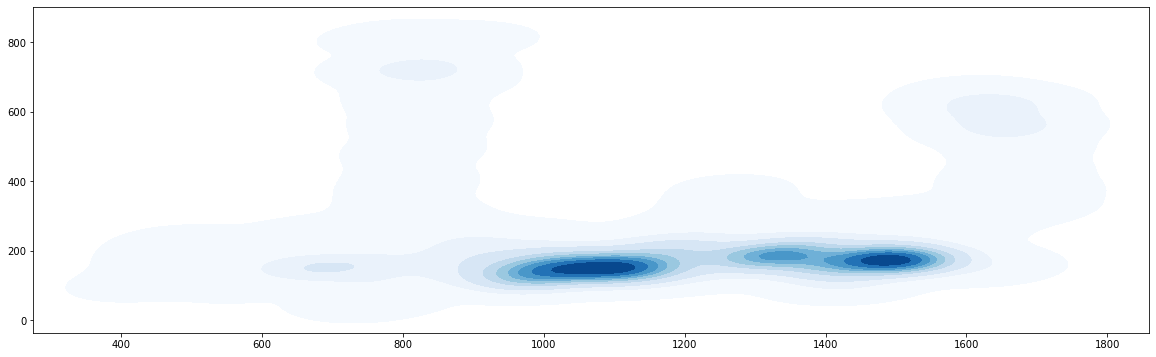

In [463]:
ax = sns.kdeplot(x=x1, y=y1, cmap="Blues", shade=True, thresh=0.001)

In [464]:
x2 = []
y2 = []
for i in range(len(person_2)):
    x2.append(person_2["position"][i][0])
    y2.append(800 - person_2["position"][i][1])      

In [465]:
min(y2)

12.480000000000018

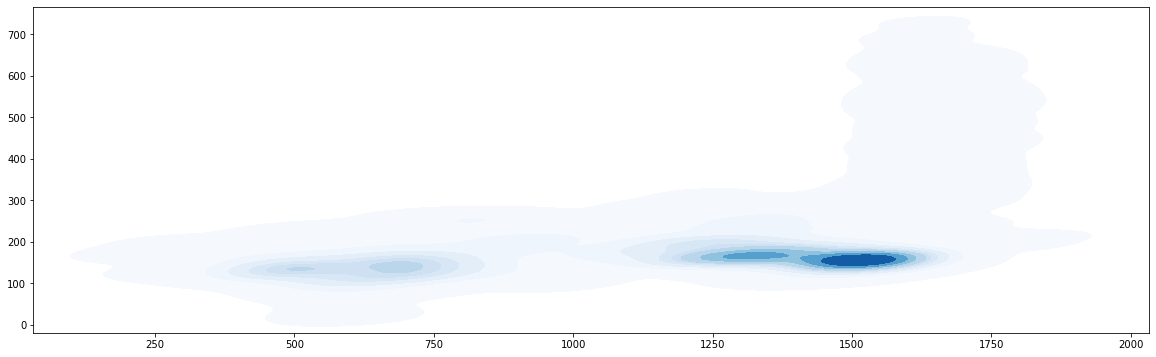

In [466]:
ax = sns.kdeplot(x=x2, y=y2, cmap="Blues", shade=True, thresh=0.001)

Make Grid
Each box of a certain size.

In [ ]:
SIZE = 20

In [467]:
person_2[17450:20981]

,level_0,index,frame,tracklet_id,l,t,w,h,probability_of_detection,person_id,position,x,y
17450,18650,39185,19670,21,1432.84,476.64,177.13,351.11,0.83,2.0,"(1521.405, 652.1949999999999)",1521.405,652.195
17451,18651,39187,19671,21,1434.21,476.79,174.44,346.37,0.83,2.0,"(1521.43, 649.975)",1521.430,649.975
17452,18652,39189,19672,21,1434.83,477.30,173.23,344.50,0.83,2.0,"(1521.445, 649.55)",1521.445,649.550
17453,18653,39191,19673,21,1436.33,477.27,172.02,341.77,0.83,2.0,"(1522.34, 648.155)",1522.340,648.155
17454,18654,39193,19674,21,1435.56,477.48,172.44,343.19,0.84,2.0,"(1521.78, 649.075)",1521.780,649.075
17455,18655,39195,19675,21,1435.65,477.33,171.84,341.72,0.83,2.0,"(1521.5700000000002, 648.19)",1521.570,648.190
17456,18656,39197,19676,21,1436.16,477.72,170.66,339.36,0.84,2.0,"(1521.49, 647.4000000000001)",1521.490,647.400
17457,18657,39199,19677,21,1434.30,476.97,172.53,343.85,0.83,2.0,"(1520.565, 648.895)",1520.565,648.895
17458,18658,39201,19678,21,1433.84,477.13,174.54,349.09,0.83,2.0,"(1521.11, 651.675)",1521.110,651.675
17459,18659,39203,19679,21,1434.87,477.64,172.89,346.19,0.83,2.0,"(1521.3149999999998, 650.735)",1521.315,650.735


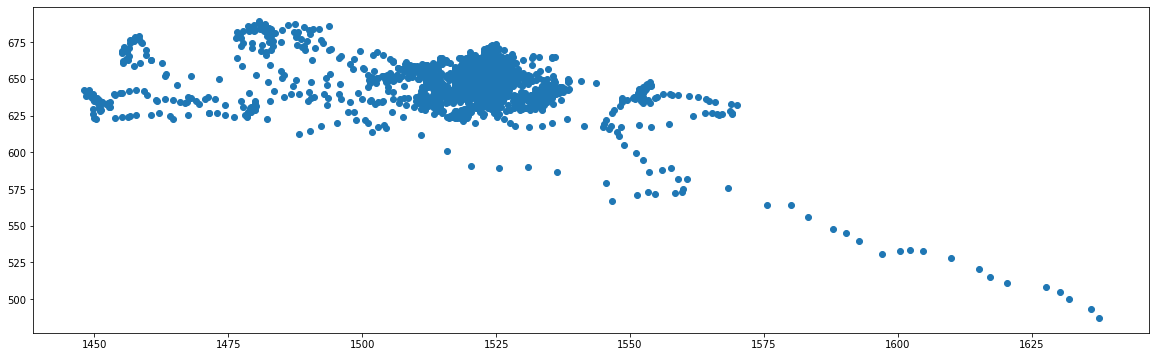

In [418]:
plt.scatter(*zip(*person_2["position"][17450:20981]))

In [435]:
1450<person_2["x"][1]<1600

True

In [ ]:
#Define computer box as between x:1450 - 1600, y: 575 - 1700

In [619]:
conditions_comp=[(1450 < person_1["x"]) & (person_1["x"] < 1600) & (575 < person_1["y"]) & (person_1["y"] < 700)]
choices_comp=[1]
person_1["computer"] = np.select(conditions_comp, choices_comp, default = 0).astype('bool')

conditions_desk=[(330 < person_1["x"]) & (person_1["x"] < 1600) & (575 < person_1["y"]) & (person_1["y"] < 700)]
choices_desk=[1]
person_1["desk"] = np.select(conditions_desk, choices_desk, default = 0).astype('bool')

person_1

,level_0,index,frame,tracklet_id,l,t,w,h,probability_of_detection,person_id,position,x,y,computer,desk
0,1200,2325,2059,1,1256.43,424.45,183.34,356.93,0.88,1.0,"(1348.1000000000001, 602.915)",1348.100,602.915,False,True
1,1201,2327,2060,1,1256.70,425.53,182.70,356.24,0.87,1.0,"(1348.05, 603.65)",1348.050,603.650,False,True
2,1202,2329,2061,1,1257.05,426.37,181.07,352.85,0.87,1.0,"(1347.585, 602.7950000000001)",1347.585,602.795,False,True
3,1203,2331,2062,1,1257.24,427.12,178.54,347.09,0.88,1.0,"(1346.51, 600.665)",1346.510,600.665,False,True
4,1204,2333,2063,1,1257.32,427.83,178.47,346.73,0.88,1.0,"(1346.5549999999998, 601.1949999999999)",1346.555,601.195,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31989,33189,74656,37126,91,765.65,480.35,172.73,347.46,0.87,1.0,"(852.015, 654.08)",852.015,654.080,False,True
31990,33190,74658,37127,91,767.65,480.46,171.87,346.04,0.86,1.0,"(853.585, 653.48)",853.585,653.480,False,True
31991,33191,74660,37128,91,769.41,480.95,172.20,347.27,0.85,1.0,"(855.51, 654.585)",855.510,654.585,False,True
31992,33192,74662,37129,91,772.60,482.03,171.72,347.27,0.85,1.0,"(858.46, 655.665)",858.460,655.665,False,True


In [620]:
conditions_comp=[(1450 < person_2["x"]) & (person_2["x"] < 1600) & (575 < person_2["y"]) & (person_2["y"] < 700)]
choices_comp=[1]
person_2["computer"] = np.select(conditions_comp, choices_comp, default = 0).astype('bool')

conditions_desk=[(300 < person_2["x"]) & (person_2["x"] < 1600) & (550 < person_2["y"]) & (person_2["y"] < 700)]
choices_desk=[1]
person_2["desk"] = np.select(conditions_desk, choices_desk, default = 0).astype('bool')

person_2

,level_0,index,frame,tracklet_id,l,t,w,h,probability_of_detection,person_id,position,x,y,computer,desk
0,1200,2476,2134,4,1438.79,485.40,176.15,295.97,0.85,2.0,"(1526.865, 633.385)",1526.865,633.385,True,True
1,1201,2478,2135,4,1438.02,485.45,175.77,295.80,0.86,2.0,"(1525.905, 633.35)",1525.905,633.350,True,True
2,1202,2480,2136,4,1437.67,485.45,177.55,299.30,0.86,2.0,"(1526.4450000000002, 635.1)",1526.445,635.100,True,True
3,1203,2482,2137,4,1437.21,485.45,177.11,299.28,0.85,2.0,"(1525.765, 635.0899999999999)",1525.765,635.090,True,True
4,1204,2484,2138,4,1437.35,485.44,178.10,301.48,0.86,2.0,"(1526.3999999999999, 636.1800000000001)",1526.400,636.180,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34138,35338,74631,37113,101,518.42,520.82,178.03,320.76,0.90,2.0,"(607.435, 681.2)",607.435,681.200,False,True
34139,35339,74633,37114,101,515.55,521.82,179.96,320.56,0.89,2.0,"(605.53, 682.1)",605.530,682.100,False,True
34140,35340,74635,37115,101,512.69,522.44,181.67,319.76,0.89,2.0,"(603.5250000000001, 682.32)",603.525,682.320,False,True
34141,35341,74637,37116,101,512.99,522.92,179.68,310.26,0.88,2.0,"(602.83, 678.05)",602.830,678.050,False,True


In [621]:
#Desk time
person_1["desk"].value_counts()[1]/30

941.6

In [622]:
person_2["desk"].value_counts()[1]/30

1068.4

In [472]:
#Duration is 20:52 - 1:12 = 19:40 = 1180 seconds
34983/1180
#~30 frames per second

29.646610169491524

In [623]:
#Total time under analysis was 1180 seconds.
#Total time at computer was:
person_1["computer"].value_counts()[1]/30

196.2

In [624]:
person_2["computer"].value_counts()[1]/30

356.6

In [481]:
#Percentage of time at computer was:
person_2["computer"].value_counts()[1]/(person_2["computer"].value_counts()[1] + person_2["computer"].value_counts()[0])*100

31.332923293207976

In [564]:
#Percentage of time at computer was:
person_1["computer"].value_counts()[1]/(person_1["computer"].value_counts()[1] + person_1["computer"].value_counts()[0])*100

18.397199474901544

In [ ]:
#Aisle Walk

In [566]:
#No. aisle walks
aisle_1 = person_1[person_1["y"] < 425]
aisle_2 = person_2[person_2["y"] < 425]

In [587]:
#No. aisle walks
(len(aisle_1.groupby(aisle_1.index.to_series().diff().ne(1).cumsum()).groups), 
 len(aisle_2.groupby(aisle_2.index.to_series().diff().ne(1).cumsum()).groups))

(6, 5)

In [574]:
a_dict_1 = aisle_1.groupby(aisle_1.index.to_series().diff().ne(1).cumsum()).groups
a_dict_2 = aisle_2.groupby(aisle_2.index.to_series().diff().ne(1).cumsum()).groups

In [570]:
#Length of aisle walks

lengths_1 = [len(aisle_walk) for aisle_walk in a_dict_1.values()]
lengths_2 = [len(aisle_walk) for aisle_walk in a_dict_2.values()]

(sum(lengths_1)/len(lengths_1), sum(lengths_2)/len(lengths_2))

(345.1666666666667, 129.8)

In [ ]:
#Which aisle?

person_1[person_1["frame"] == 10266]
person_1.iloc[[6745]]

In [614]:
#convert index numbers into frame numbers
frames_1 = []
for i in a_dict_1.values():
    walk = []
    for j in i:
        walk.append(int(person_1.iloc[[j]]["frame"]))
    frames_1.append(walk)

frames_2 = []
for i in a_dict_2.values():
    walk = []
    for j in i:
        walk.append(int(person_2.iloc[[j]]["frame"]))
    frames_2.append(walk)


for i in range(len(frames_1)):
    print(len(frames_1[i]))
    print(frames_1[i][-1])
    print(frames_1[i+1][0])
    print(frames_1[i+1][0] - frames_1[i][-1])
    print("-------------")
    

4
5926
5931
5
-------------
133
6482
9140
2658
-------------
90
10288
20498
10210
-------------
1248
23298
33365
10067
-------------
12
33376
33478
102
-------------
584
34063


IndexError: list index out of range

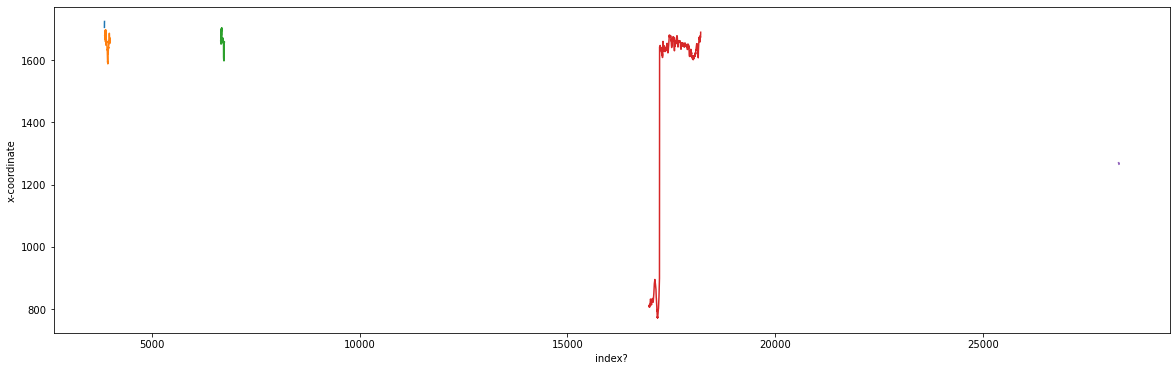

In [616]:
#Plot x-coordinates of aisle walks

plt.xlabel("index?")
plt.ylabel("x-coordinate")
for i in range(len(a_dict)):
    thing = person_1[min(a_dict_1[i+1]):max(a_dict_1[i+1])]
    plt.plot(thing["x"])

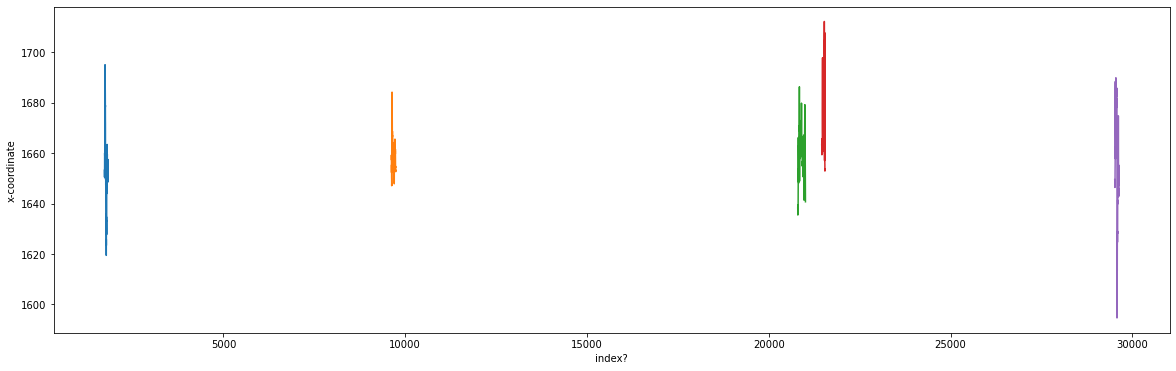

In [615]:
plt.xlabel("index?")
plt.ylabel("x-coordinate")
for i in range(len(a_dict)):
    thing = person_2[min(a_dict_2[i+1]):max(a_dict_2[i+1])]
    plt.plot(thing["x"])

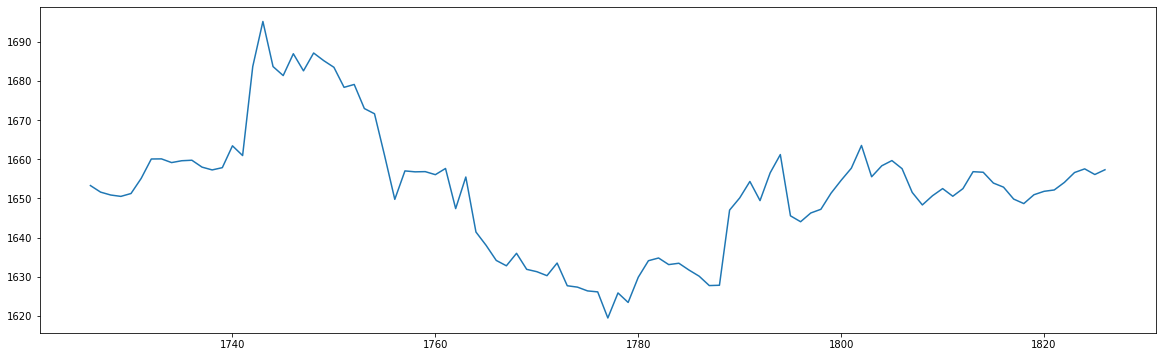

In [551]:
aisle_walk_1 = person_2[min(a_dict[1]):max(a_dict[1])]

plt.plot(aisle_walk_1["x"])

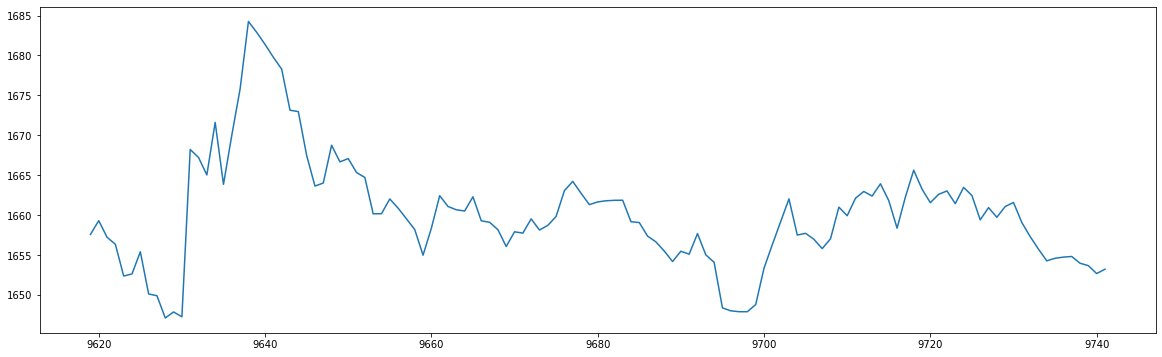

In [552]:
aisle_walk_2 = person_2[min(a_dict[2]):max(a_dict[2])]

plt.plot(aisle_walk_2["x"])

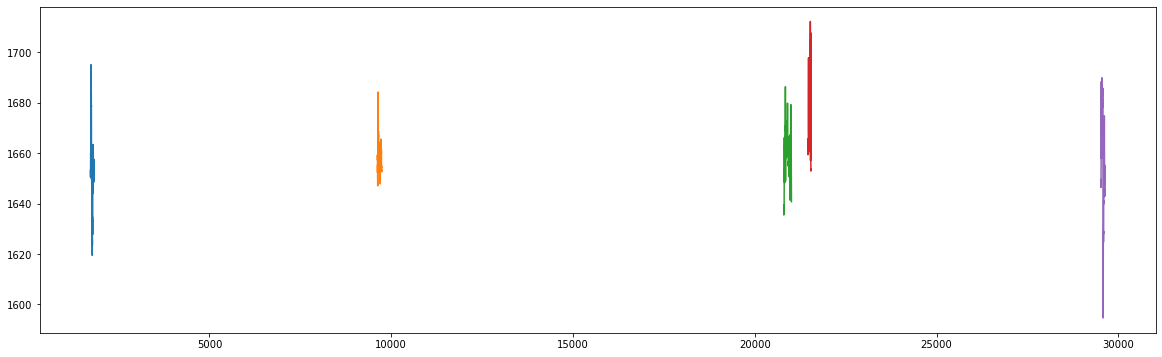

In [618]:
a_dict_1[1]

Int64Index([3864, 3865, 3866, 3867], dtype='int64')

In [617]:
frames_1

[[5923, 5924, 5925, 5926],
 [5931,
  5932,
  5933,
  5934,
  5935,
  5936,
  5937,
  5938,
  5939,
  5940,
  5941,
  5942,
  5943,
  5944,
  5945,
  5946,
  5947,
  5948,
  5949,
  5950,
  5951,
  5952,
  5953,
  5954,
  5955,
  5956,
  5957,
  5958,
  5959,
  5960,
  5961,
  5962,
  5963,
  5964,
  5965,
  5966,
  5967,
  5968,
  5969,
  5970,
  5971,
  5972,
  5973,
  5974,
  5975,
  5976,
  5977,
  5978,
  5979,
  5980,
  5981,
  5982,
  5983,
  5984,
  5985,
  5986,
  5987,
  5988,
  5989,
  5990,
  5991,
  5992,
  5993,
  5994,
  5998,
  5999,
  6000,
  6001,
  6002,
  6003,
  6004,
  6005,
  6006,
  6007,
  6008,
  6423,
  6424,
  6425,
  6428,
  6429,
  6430,
  6431,
  6432,
  6433,
  6434,
  6435,
  6436,
  6437,
  6438,
  6439,
  6440,
  6441,
  6442,
  6443,
  6444,
  6445,
  6446,
  6447,
  6448,
  6449,
  6450,
  6451,
  6452,
  6453,
  6454,
  6455,
  6456,
  6457,
  6458,
  6459,
  6460,
  6461,
  6462,
  6463,
  6464,
  6465,
  6466,
  6467,
  6468,
  6469,
  6470,
  647

In [330]:
#Transformation
H = np.array([[ 1.05278912e+00 , 3.68006799e-01, -7.05496230e+02],
 [ 4.03594194e-02 , 1.02726776e+00, -1.35568230e+02],
 [-4.88941331e-06,  5.97119721e-04,  1.00000000e+00]])

person_1["trans_position"] = [np.matmul(H, person_1["position"][i]) for i in range(len(person_1))]

In [ ]:
person_1["transposition2"] = person_1["position"].apply(lambda x: np.asarray(np.matmul(H,x)))